# Sample Temperature Plots

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [4]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def plot_station(df):
    plt.figure(figsize=(8,8))
    plt.scatter(df['LONGITUDE'].tolist(), df['LATITUDE'].tolist(), c = 'b', alpha = 0.7, s = 200)
    return mplleaflet.display()

df = pd.read_csv('GHCND_sample_csv.csv')
plot_station(df)

In [2]:
pd.__version__

'0.19.2'

In [3]:
all_temps = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv',
                        usecols=[1, 2, 3], 
                        index_col=0,
                        parse_dates=True, infer_datetime_format=True,
                        converters={'Data_Value': lambda v: float(v) / 10})
all_temps.rename(columns={'Data_Value': 'Temperature'}, inplace=True)
all_temps.head()

,Element,Temperature
Date,,
2014-11-12,TMAX,2.2
2009-04-29,TMIN,5.6
2008-05-26,TMAX,27.8
2005-11-11,TMAX,13.9
2014-02-27,TMAX,-10.6


In [4]:
period1_temps = all_temps.loc['2005-01-01':'2014-12-31']
period2_temps = all_temps.loc['2015-01-01':'2015-12-31']

In [5]:
def get_record_temps(temps):
    record_temps = []

    for selector in ('TMIN', 'TMAX'):
        df = temps.where(temps['Element'] == selector).dropna().drop('Element', axis=1)
        df_group = df.groupby(df.index.dayofyear)
        record_temps.append(df_group.min() if selector == 'TMIN' else df_group.max())
    
    for record_temp in record_temps:
        if record_temp.shape[0] == 366:
            record_temp.drop(31 + 29, inplace=True)
        record_temp.reset_index(drop=True, inplace=True)
    
    return record_temps[0].merge(record_temps[1], 
                                 how='inner', 
                                 left_index=True, right_index=True,
                                 suffixes=['_MIN', '_MAX'])

In [6]:
period1_record_temps = get_record_temps(period1_temps)
period1_record_temps.head()

,Temperature_MIN,Temperature_MAX
0,-16.0,15.6
1,-26.7,13.9
2,-26.7,13.3
3,-26.1,10.6
4,-15.0,12.8


In [7]:
period2_record_temps = get_record_temps(period2_temps)
period2_record_temps.head()

,Temperature_MIN,Temperature_MAX
0,-13.3,1.1
1,-12.2,3.9
2,-6.7,3.9
3,-8.8,4.4
4,-15.5,2.8


In [8]:
%matplotlib inline

from matplotlib.ticker import MultipleLocator

In [9]:
# Determine the limits.
period1_min_temp = period1_record_temps['Temperature_MIN'].min()
period1_max_temp = period1_record_temps['Temperature_MAX'].max()
period2_min_temp = period2_record_temps['Temperature_MIN'].min()
period2_max_temp = period2_record_temps['Temperature_MAX'].max()

min_temp = min(period1_min_temp, period2_min_temp)
max_temp = max(period1_max_temp, period2_max_temp)
min_temp, max_temp

(-34.299999999999997, 40.600000000000001)

In [10]:
# Find the extreme temperatures in 2015.
extreme_low_temps = []
extreme_high_temps = []

for day in range(365):
    if period2_record_temps.loc[day, 'Temperature_MIN'] < period1_record_temps.loc[day, 'Temperature_MIN']:
        extreme_low_temps.append((day, period2_record_temps.loc[day, 'Temperature_MIN']))
    if period2_record_temps.loc[day, 'Temperature_MAX'] > period1_record_temps.loc[day, 'Temperature_MAX']:
        extreme_high_temps.append((day, period2_record_temps.loc[day, 'Temperature_MAX']))

print(extreme_low_temps)
print(extreme_high_temps)

[(4, -15.5), (10, -20.0), (33, -23.800000000000001), (44, -23.899999999999999), (45, -26.0), (46, -29.399999999999999), (47, -27.199999999999999), (49, -26.0), (50, -34.299999999999997), (51, -32.200000000000003), (53, -26.699999999999999), (54, -27.199999999999999), (55, -21.699999999999999), (56, -21.600000000000001), (57, -28.800000000000001), (58, -27.199999999999999), (59, -24.399999999999999), (63, -22.100000000000001), (64, -25.5), (65, -22.199999999999999), (85, -11.699999999999999), (86, -12.199999999999999), (87, -11.1), (88, -12.199999999999999), (112, -4.2999999999999998), (113, -7.0999999999999996), (117, -3.2000000000000002), (133, 0.59999999999999998), (139, 0.0), (157, 5.5999999999999996), (183, 7.2000000000000002), (216, 8.3000000000000007), (239, 5.5999999999999996), (289, -5.5), (290, -5.5), (291, -6.0999999999999996), (292, -3.8999999999999999)]
[(39, 8.3000000000000007), (127, 33.299999999999997), (128, 31.100000000000001), (136, 30.0), (137, 31.699999999999999), (

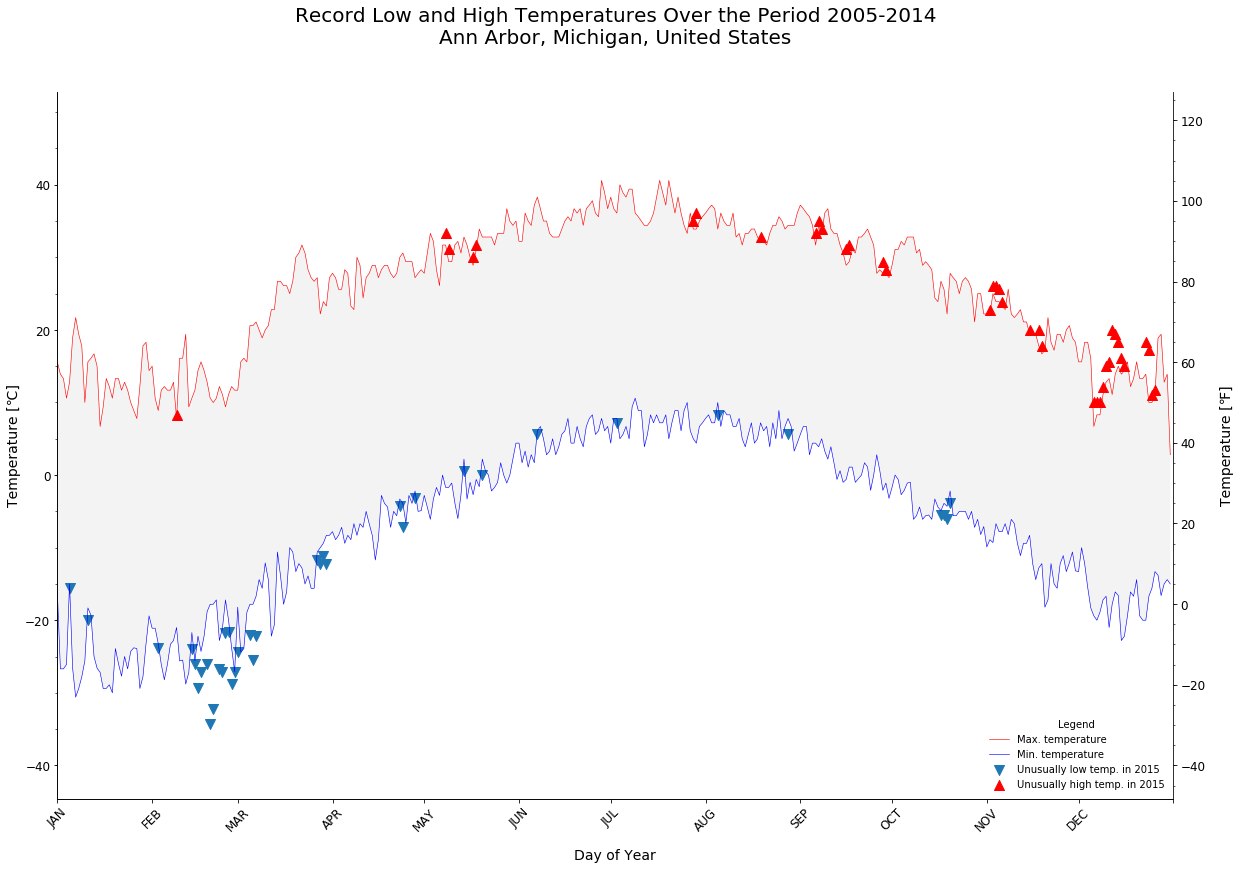

In [11]:
import numpy as np

# Make the primary temperature plot.
ax1 = period1_record_temps.plot.line(
    y=['Temperature_MAX', 'Temperature_MIN'], 
    figsize=(20, 13),
    ylim=(1.3 * min_temp, 1.3 * max_temp),
    xticks=np.array([0, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]).cumsum(),
    rot=45,
    fontsize=12, 
    style=['-r', '-b'], linewidth=0.6,
    legend=False,
    x_compat=True)
ax1.lines[0].set_label('Max. temperature')
ax1.lines[-1].set_label('Min. temperature')
ax1.set_title('Record Low and High Temperatures Over the Period 2005-2014\nAnn Arbor, Michigan, United States', fontsize= 20, y=1.06)
ax1.set_xlabel('Day of Year', fontsize=14, labelpad=15)
ax1.set_ylabel('Temperature [\u2103]', fontsize=14)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', '']
ax1.set_xticklabels(months)
ax1.yaxis.set_minor_locator(MultipleLocator(5))
ax1.fill_between(period1_record_temps.index, 
                 period1_record_temps['Temperature_MAX'], period1_record_temps['Temperature_MIN'], 
                 facecolor='lightgray', alpha=0.25)

# Add another Y axis to show the Fahrenheit scale.
def fahrenheit_to_celisus(temp):
    return 1.8 * temp + 32

ax2 = ax1.twinx()
y_min, y_max = ax1.get_ylim()
ax2.set_ylim(fahrenheit_to_celisus(y_min), fahrenheit_to_celisus(y_max))
ax2.set_ylabel('Temperature [\u2109]', fontsize=14, labelpad=15)
ax2.spines['top'].set_visible(False)
ax2.yaxis.set_minor_locator(MultipleLocator(5))
for label in ax2.get_yticklabels():
    label.set_fontsize(12)
    
# Superimpose the requested scatter plot with extreme temperatures in 2015.
def get_days(extreme_temps):
    return [item[0] for item in extreme_temps]

def get_temps(extreme_temps):
    return [item[1] for item in extreme_temps]

ax1.scatter(get_days(extreme_low_temps), get_temps(extreme_low_temps), 
            marker='v', s=100, label='Unusually low temp. in 2015')
ax1.scatter(get_days(extreme_high_temps), get_temps(extreme_high_temps), 
            color='red', marker='^', s=100, label='Unusually high temp. in 2015')
ax1.legend(loc=4, frameon=False, title='Legend')